In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
import scipy
from scipy import interpolate
import scipy.integrate as si
import pandas as pd
from astropy.io import fits
from pylab import imshow,cm
from matplotlib.colors import LogNorm
import pyfits

In [2]:
c=3e5; h=0.7; H0=100.*h
print H0/c

0.000233333333333


In [3]:
hdulist = pyfits.open('../data_a70.fits')
tbdata = hdulist[1].data

In [4]:
print tbdata[0]
tbdata.field(0)
tbdata['HIra'][np.where(tbdata['HIra']>260)[0]] -=360
code1 = tbdata[np.where((tbdata['detcode']<2)&(tbdata['vcmb']>700.)&(tbdata['vcmb']<15000.))]
code2 = tbdata[np.where((tbdata['detcode']<9)&(tbdata['vcmb']>700.)&(tbdata['vcmb']<15000.))]
print code1.shape
print code2.shape
print tbdata[np.where((tbdata['detcode']==2)&(tbdata['vcmb']>700.)&(tbdata['vcmb']<15000.)&(tbdata['snratio']>10))].shape

(748640, 324.02459700000003, 15.781388, 7908.0, 7573.7473158055554, 181.0, 14.0, 1.49, 0.070000000000000007, 11.800000000000001, 2.1000000000000001, 108.2, 9.6099999999999994, 1)
(18194,)
(22729,)
(25,)


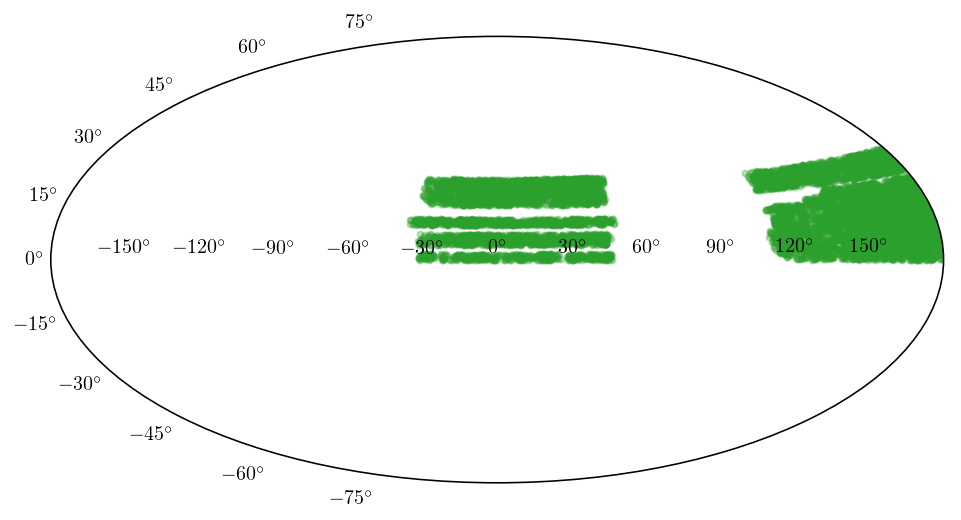

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1['HIra'])*np.pi/180., code1['HIdec']*np.pi/180., marker='.', color='C2', alpha =0.3)

In [7]:
print np.min(code1['HIra']), np.max(code1['HIra'])
print np.min(code1['HIdec']), np.max(code1['HIdec'])

-35.975403 250.092911
-0.183611 32.180279


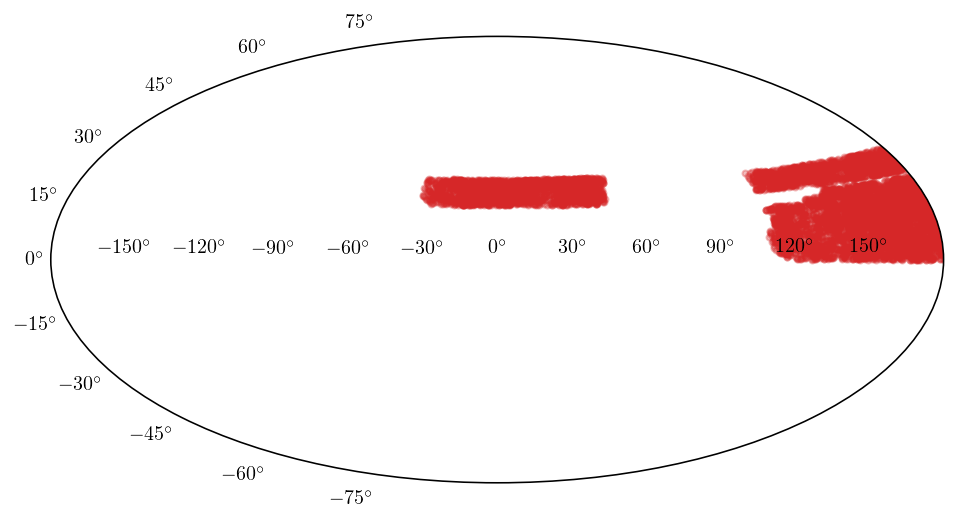

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
# ax.scatter((code1['HIra'])*np.pi/180., code1['HIdec']*np.pi/180., marker='.')

boxes3 = np.where((code1['HIdec']<20) & (code1['HIdec']>-2) & (np.absolute(code1['HIra'])<60))[0]
boxes3n = np.where((code1['HIdec']>20) | (np.absolute(code1['HIra'])>7.*15) & (np.absolute(code1['HIra'])<17*15.))[0]
code1box3s = code1[boxes3]
code1box3n = code1[boxes3n]
# ax.scatter((code1box3['HIra'])*np.pi/180., code1box3['HIdec']*np.pi/180., marker='.', color='C2', alpha =0.3)
# ax.scatter((code1box3['HIra'])*np.pi/180., code1box3['HIdec']*np.pi/180., marker='.', color='C2', alpha =0.3)
ax.scatter((code1box3n['HIra'])*np.pi/180., code1box3n['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

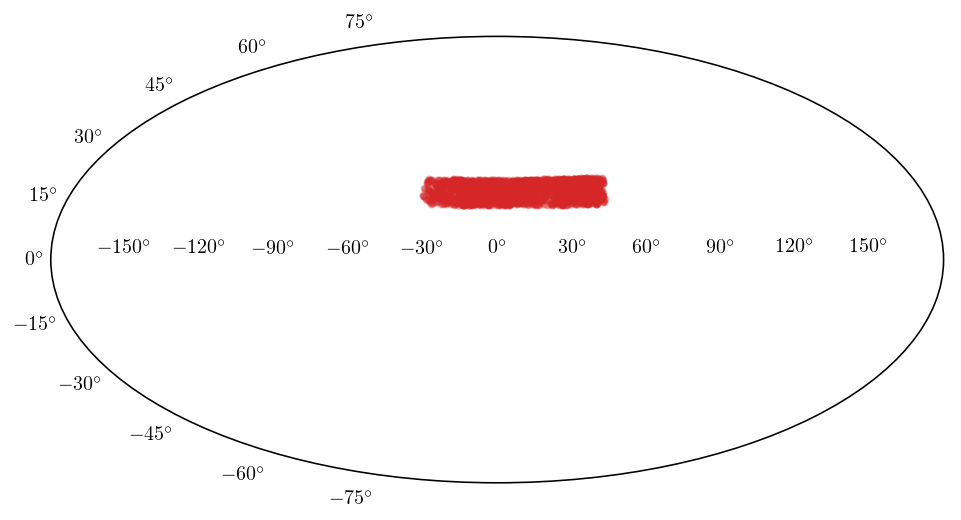

In [9]:
box1 = np.where((code1box3n['HIra']<70))[0]
code1box1 = code1box3n[box1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box1['HIra'])*np.pi/180., code1box1['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

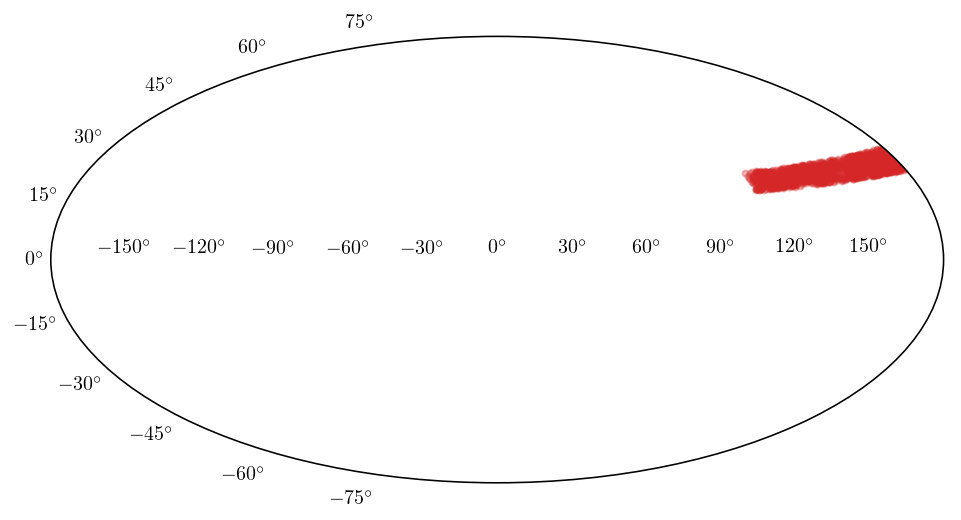

In [10]:
box2 = np.where((code1box3n['HIdec']>23) & ((code1box3n['HIra']>90) & (code1box3n['HIra']<270)))[0]
code1box2 = code1box3n[box2]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box2['HIra'])*np.pi/180., code1box2['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

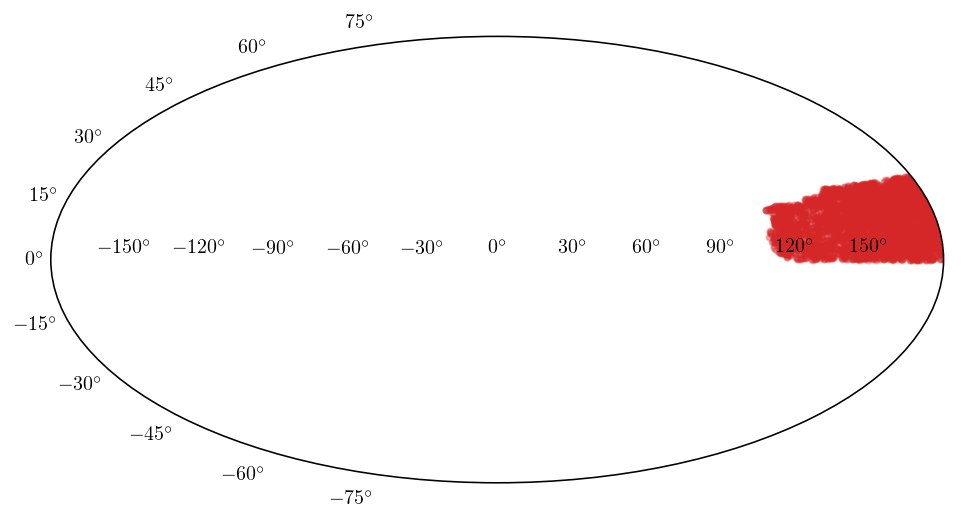

In [11]:
box3interm = np.where((code1box3n['HIdec']<23) & ((code1box3n['HIra']>90) & (code1box3n['HIra']<270)))[0]
code1box3interm = code1box3n[box3interm]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box3interm['HIra'])*np.pi/180., code1box3interm['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

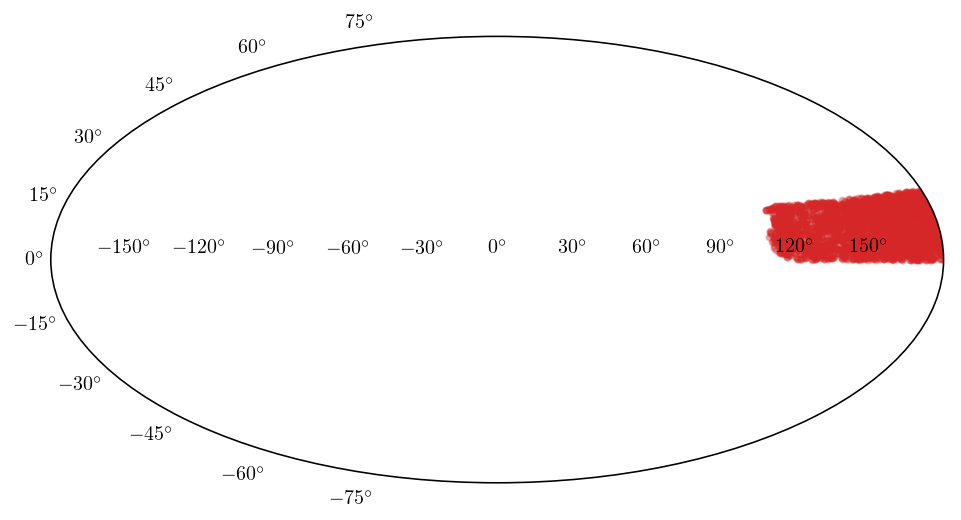

In [12]:
box3 = np.where((code1box3interm['HIdec']<18.3))[0]
code1box3 = code1box3interm[box3]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box3['HIra'])*np.pi/180., code1box3['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

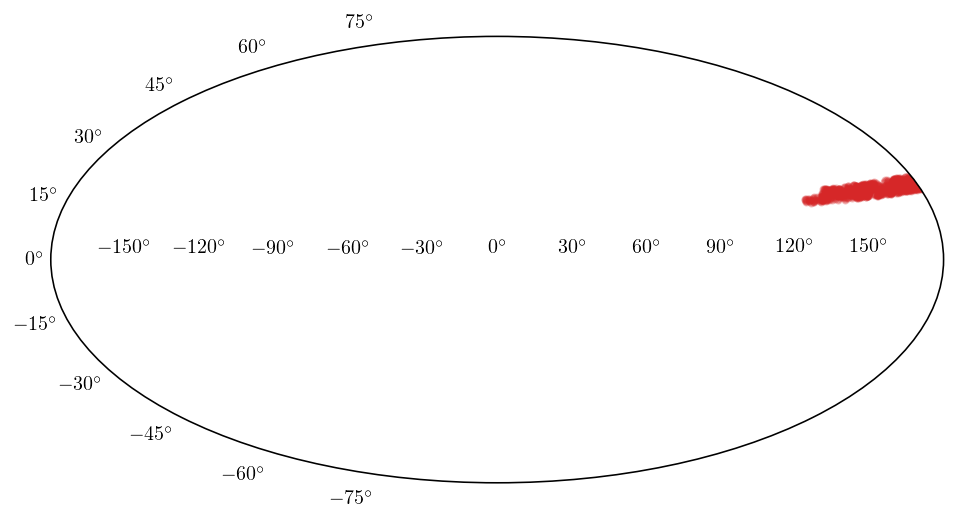

In [13]:
box4 = np.where((code1box3interm['HIdec']>=18.3))[0]
code1box4 = code1box3interm[box4]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box4['HIra'])*np.pi/180., code1box4['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

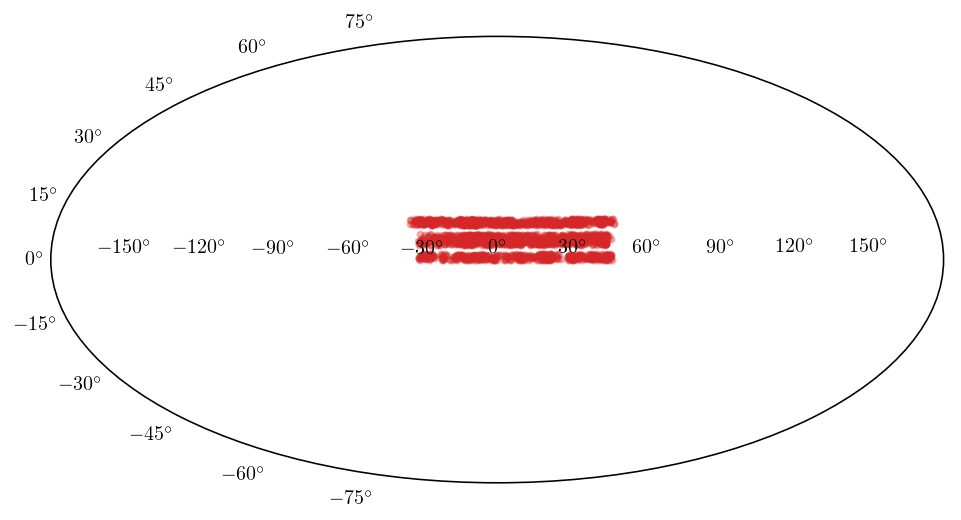

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((code1box3s['HIra'])*np.pi/180., code1box3s['HIdec']*np.pi/180., marker='.', color='C3', alpha =0.3)

15835
18194
18194


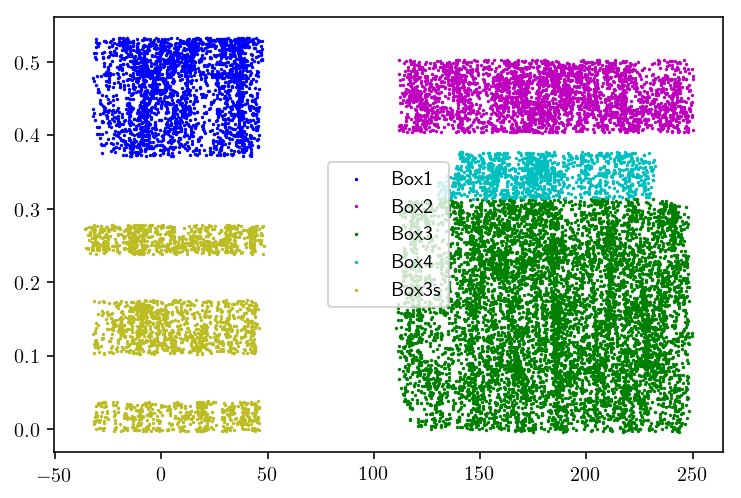

In [15]:
ax = plt.gca()
ax.scatter((code1box1['HIra']), np.cos(np.pi/2.-code1box1['HIdec']*np.pi/180.), marker='.', s=2, color='b', label='Box1')
ax.scatter((code1box2['HIra']), np.cos(np.pi/2.-code1box2['HIdec']*np.pi/180.), marker='.', s=2, color='m', label='Box2')
ax.scatter((code1box3['HIra']), np.cos(np.pi/2.-code1box3['HIdec']*np.pi/180.), marker='.', s=2, color='g', label='Box3')
ax.scatter((code1box4['HIra']), np.cos(np.pi/2.-code1box4['HIdec']*np.pi/180.), marker='.', s=2, color='c', label='Box4')
ax.scatter((code1box3s['HIra']), np.cos(np.pi/2.-code1box3s['HIdec']*np.pi/180.), marker='.', s=2, color='C8', label='Box3s')
plt.legend(loc=0)

print np.size(code1box1['HIra'])+np.size(code1box2['HIra'])+np.size(code1box3['HIra'])+np.size(code1box4['HIra'])
print np.size(code1box1['HIra'])+np.size(code1box2['HIra'])+np.size(code1box3['HIra'])+np.size(code1box4['HIra'])\
    +np.size(code1box3s['HIra'])

print np.size(code1box3n['HIra'])+np.size(code1box3s['HIra'])

21.844444 32.180279
47.544582


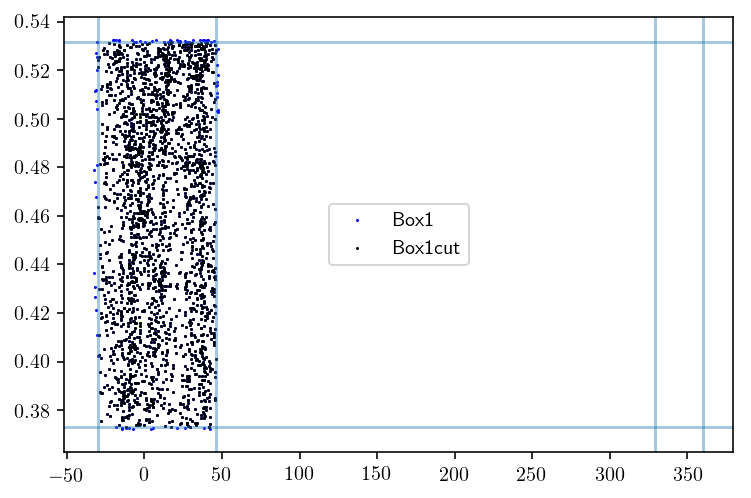

In [16]:
print (code1box1['HIdec']).min(), code1box1['HIdec'].max()
print (code1box1['HIra'][np.where(code1box1['HIra']<70)]).max()#, code1box1['HIdec'].max()
# print (code1box1['HIra'][np.where(code1box1['HIra']>70)]).min()#, code1box1['HIdec'].max()

ax = plt.gca()
ax.scatter((code1box1['HIra']), np.cos(np.pi/2.-code1box1['HIdec']*np.pi/180.), marker='.', s=1, color='b', label='Box1')
ax.axvline(46,alpha=0.4)
ax.axvline(-30.,alpha=0.4)
ax.axvline(329.,alpha=0.4)
ax.axvline(360.,alpha=0.4)

ax.axhline(np.cos(np.pi/2.-21.9*np.pi/180.),alpha=0.4)
ax.axhline(np.cos(np.pi/2.-32.1*np.pi/180.),alpha=0.4)

databox1 = code1box1[np.where((code1box1['HIdec']>21.9) & (code1box1['HIdec']<=32.1) &
                              (((code1box1['HIra']>=-30) & (code1box1['HIra']<=46))))[0]]
ax.scatter((databox1['HIra']), np.cos(np.pi/2.-databox1['HIdec']*np.pi/180.), marker='.', s=1, color='k', label='Box1cut')
plt.legend(loc=0)

23.820557 30.181389
111.732498 250.092911


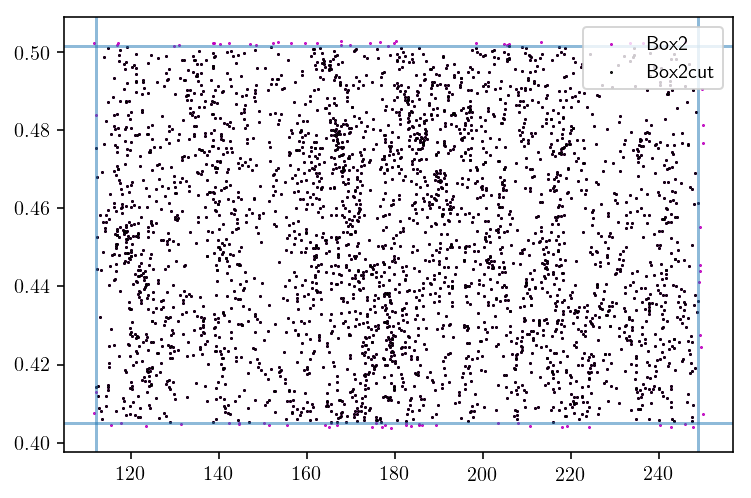

In [17]:
print (code1box2['HIdec']).min(), code1box2['HIdec'].max()
print (code1box2['HIra']).min(), code1box2['HIra'].max()
ax = plt.gca()
ax.scatter((code1box2['HIra']), np.cos(np.pi/2.-code1box2['HIdec']*np.pi/180.), marker='.', s=1, color='m', label='Box2')
ax.axvline(112.1,alpha=0.5)
ax.axvline(249.,alpha=0.5)
ax.axhline(np.cos(np.pi/2.-23.9*np.pi/180.),alpha=0.5)
ax.axhline(np.cos(np.pi/2.-30.1*np.pi/180.),alpha=0.5)

databox2 = code1box2[np.where((code1box2['HIdec']>23.9) & (code1box2['HIdec']<=30.1) &
                              ((code1box2['HIra']>=112.1) & (code1box2['HIra']<=249.)))[0]]
ax.scatter((databox2['HIra']), np.cos(np.pi/2.-databox2['HIdec']*np.pi/180.), marker='.', s=1, color='k', label='Box2cut')
plt.legend(loc=0)


-0.183611 18.292778
110.34333 249.85791


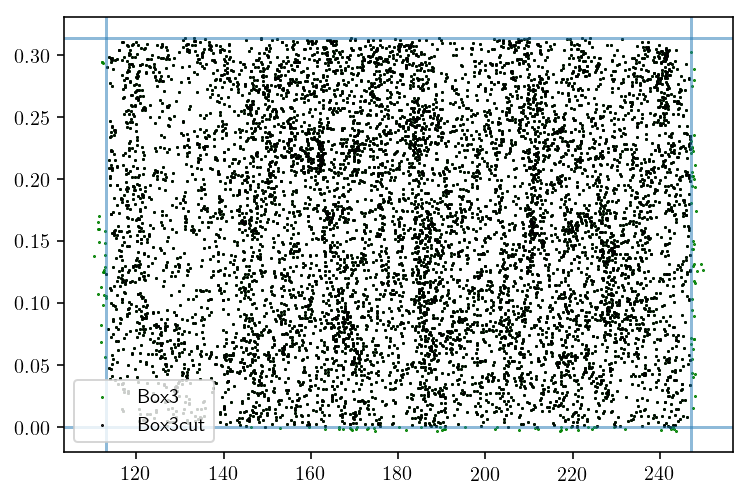

In [18]:
print (code1box3['HIdec']).min(), code1box3['HIdec'].max()
print (code1box3['HIra']).min(), code1box3['HIra'].max()
ax = plt.gca()
ax.scatter((code1box3['HIra']), np.cos(np.pi/2.-code1box3['HIdec']*np.pi/180.), marker='.', s=1, color='g', label='Box3')
ax.axvline(113,alpha=0.5)
ax.axvline(247.,alpha=0.5)
ax.axhline(0,alpha=0.5)
ax.axhline(np.cos(np.pi/2.-18.3*np.pi/180.),alpha=0.5)

databox3 = code1box3[np.where((code1box3['HIdec']>0.) & (code1box3['HIdec']<18.3) &
                              ((code1box3['HIra']>=113.) & (code1box3['HIra']<=247)))[0]]
ax.scatter((databox3['HIra']), np.cos(np.pi/2.-databox3['HIdec']*np.pi/180.), marker='.', s=1, color='k', label='Box3cut')
plt.legend(loc=0)

18.301943 22.158888
130.114166 232.135818


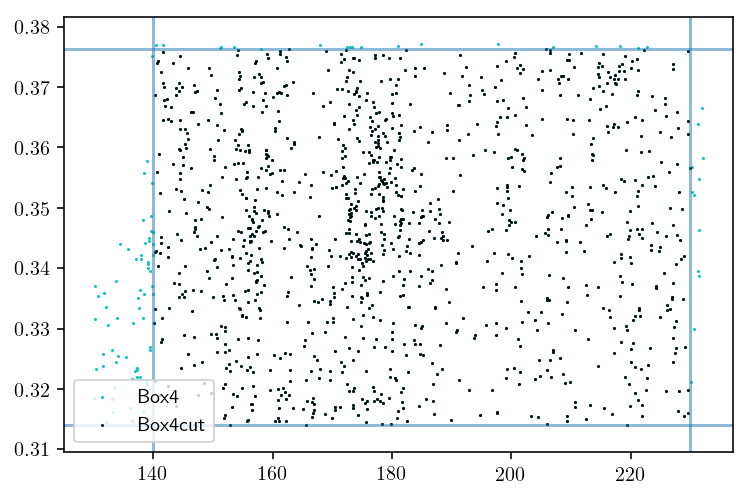

In [19]:
print (code1box4['HIdec']).min(), code1box4['HIdec'].max()
print (code1box4['HIra']).min(), code1box4['HIra'].max()
ax = plt.gca()
ax.scatter((code1box4['HIra']), np.cos(np.pi/2.-code1box4['HIdec']*np.pi/180.), marker='.', s=1, color='c', label='Box4')
ax.axvline(140,alpha=0.5)
ax.axvline(230.,alpha=0.5)
ax.axhline(np.cos(np.pi/2.-22.1*np.pi/180.),alpha=0.5)
ax.axhline(np.cos(np.pi/2.-18.3*np.pi/180.),alpha=0.5)

databox4 = code1box4[np.where((code1box4['HIdec']>=18.3) & (code1box4['HIdec']<=22.1) &
                              ((code1box4['HIra']>=140) & (code1box4['HIra']<=230)))[0]]
ax.scatter((databox4['HIra']), np.cos(np.pi/2.-databox4['HIdec']*np.pi/180.), marker='.', s=1, color='k', label='Box4cut')
plt.legend(loc=0)

-0.169167 16.173611
-35.975403 48.113335


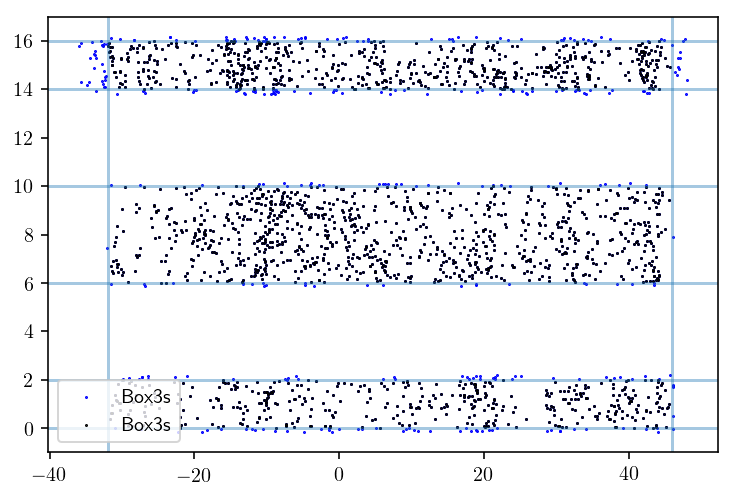

In [20]:
print (code1box3s['HIdec']).min(), code1box3s['HIdec'].max()
print (code1box3s['HIra']).min(), code1box3s['HIra'].max()

ax = plt.gca()
ax.scatter((code1box3s['HIra']), code1box3s['HIdec'], marker='.', s=1, color='b', label='Box3s')
ax.axvline(46,alpha=0.4)
ax.axvline(-32,alpha=0.4)

ax.axhline(0,alpha=0.4)
ax.axhline(16.,alpha=0.4)
ax.axhline(14.,alpha=0.4)
ax.axhline(10.,alpha=0.4)
ax.axhline(6.,alpha=0.4)
ax.axhline(2.,alpha=0.4)

databox3s = code1box3s[np.where(((code1box3s['HIra']>=-32.) & (code1box3s['HIra']<=46)) & \
                                (((code1box3s['HIdec']>0) & (code1box3s['HIdec']<=2.)) | \
                                ((code1box3s['HIdec']>6) & (code1box3s['HIdec']<=10.))| \
                                ((code1box3s['HIdec']>14) & (code1box3s['HIdec']<=16.)))
                                )[0]]
ax.scatter((databox3s['HIra']), databox3s['HIdec'], marker='.', s=1, color='k', label='Box3s')
plt.legend(loc=0)

In [21]:
fulldata = np.hstack([databox1,databox2,databox3,databox4,databox3s])
# fulldatatrial = np.vstack([databox1,databox2,databox3,databox4,databox3s])

In [32]:
# print np.min(databox1['HIra'])
# print np.min(databox3s['HIra'])
print np.min(fulldata['HIra'])
print fulldata['HIra'].size
print code1['HIra'].size
print databox1['loghimass'].min()

print code1['vcmb'].min()/c, code1['vcmb'].max()/c
print fulldata['vcmb'].min()/c, fulldata['vcmb'].max()/c
print fulldata['loghimass'].min(), fulldata['loghimass'].max()

-31.881226
17513
18194
7.3
0.00233685628838 0.049993961009
0.00233685628838 0.049993961009
6.21 10.85


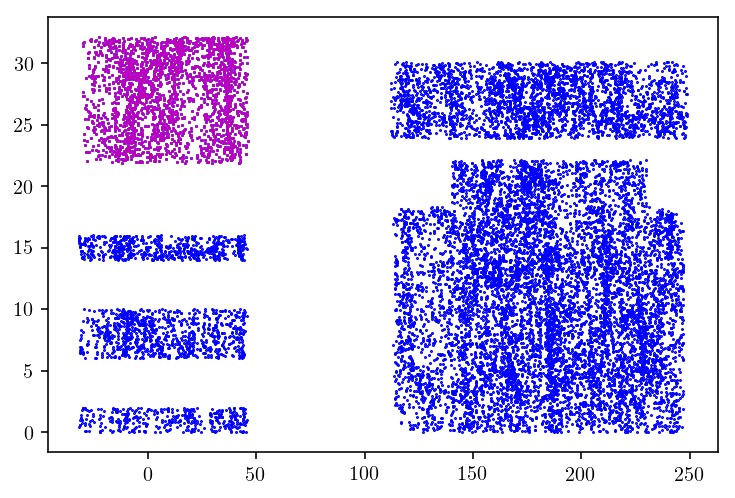

In [24]:
# ax = plt.gca()
plt.scatter(fulldata['HIra'], fulldata['HIdec'], marker='.', s=1, color='b', label='All')
plt.scatter((databox1['HIra']), databox1['HIdec'], marker='.', s=1, color='m', label='All')

# ax.axvline(46,alpha=0.4)
# ax.axvline(-32,alpha=0.4)

In [88]:
box3s1_limits = np.loadtxt('../jackknife_full/boxes_limits/box3s1.txt', unpack=True)
box3s2_limits = np.loadtxt('../jackknife_full/boxes_limits/box3s2.txt', unpack=True)
box3s3_limits = np.loadtxt('../jackknife_full/boxes_limits/box3s3.txt', unpack=True)
box1_limits   = np.loadtxt('../jackknife_full/boxes_limits/box1.txt', unpack=True)
box2_limits   = np.loadtxt('../jackknife_full/boxes_limits/box2.txt', unpack=True)
box3_limits   = np.loadtxt('../jackknife_full/boxes_limits/box3.txt', unpack=True)
box4_limits   = np.loadtxt('../jackknife_full/boxes_limits/box4.txt', unpack=True)

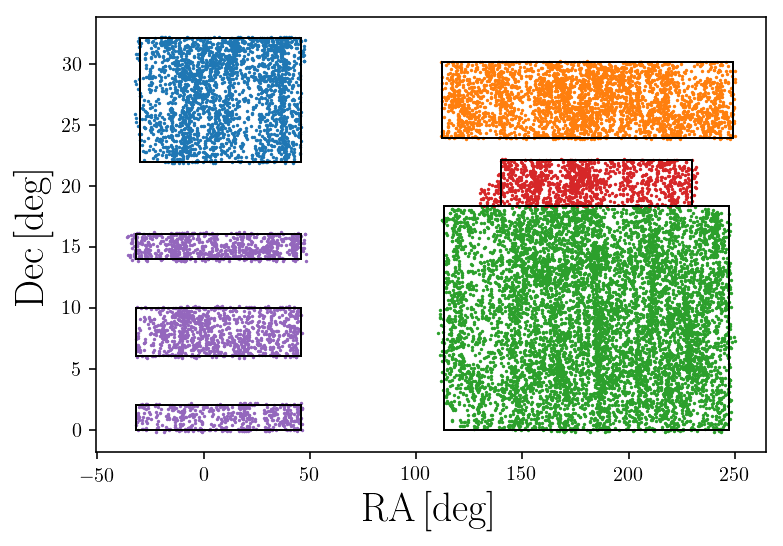

In [92]:
ax = plt.gca()
from matplotlib import patches
ax.scatter((code1box1['HIra']), code1box1['HIdec'], marker='.', s=2)#, color='b', label='Box1')
ax.scatter((code1box2['HIra']), code1box2['HIdec'], marker='.', s=2)#, color='m', label='Box2')
ax.scatter((code1box3['HIra']), code1box3['HIdec'], marker='.', s=2)#, color='g', label='Box3')
ax.scatter((code1box4['HIra']), code1box4['HIdec'], marker='.', s=2)#, color='c', label='Box4')
ax.scatter((code1box3s['HIra']), code1box3s['HIdec'], marker='.', s=2)#, color='C8', label='Box3s')
a = patches.Rectangle((box3s1_limits[1,0], box3s1_limits[0,0]),box3s1_limits[1,1]-box3s1_limits[1,0],box3s1_limits[0,1]-box3s1_limits[0,0],fill=False)      # remove background
b = patches.Rectangle((box3s2_limits[1,0], box3s2_limits[0,0]),box3s2_limits[1,1]-box3s2_limits[1,0],box3s2_limits[0,1]-box3s2_limits[0,0],fill=False)      # remove background
c = patches.Rectangle((box3s3_limits[1,0], box3s3_limits[0,0]),box3s3_limits[1,1]-box3s3_limits[1,0],box3s3_limits[0,1]-box3s3_limits[0,0],fill=False)      # remove background
d = patches.Rectangle((box1_limits[1,0], box1_limits[0,0]),box1_limits[1,1]-box1_limits[1,0],box1_limits[0,1]-box1_limits[0,0],fill=False)      # remove background
e = patches.Rectangle((box2_limits[1,0], box2_limits[0,0]),box2_limits[1,1]-box2_limits[1,0],box2_limits[0,1]-box2_limits[0,0],fill=False)      # remove background
f = patches.Rectangle((box3_limits[1,0], box3_limits[0,0]),box3_limits[1,1]-box3_limits[1,0],box3_limits[0,1]-box3_limits[0,0],fill=False)      # remove background
g = patches.Rectangle((box4_limits[1,0], box4_limits[0,0]),box4_limits[1,1]-box4_limits[1,0],box4_limits[0,1]-box4_limits[0,0],fill=False)      # remove background

ax.set_xlabel('${\\rm RA\,[deg]}$', fontsize=20)
ax.set_ylabel('${\\rm Dec\,[deg]}$', fontsize=20)
# b = patches.Rectangle((, 1.1),10,10,fill=False)      # remove background

ax.add_patch(a); ax.add_patch(b); ax.add_patch(c); ax.add_patch(d)
ax.add_patch(e); ax.add_patch(f); ax.add_patch(g)
# plt.legend(loc=0)
plt.savefig('DATA_FULL_BOXES.pdf', bbox_inches='tight')

In [23]:
print np.sum(databox1['HIdec'].shape + databox2['HIdec'].shape +databox3['HIdec'].shape+databox4['HIdec'].shape\
            +databox3s['HIdec'].shape)
print fulldata['HIdec'].shape
hdu = pyfits.BinTableHDU(fulldata)
hdu.writeto('DATA_ALL.fits')

17513
(17513,)


In [25]:
# newtable = pyfits.open('newtable.fits')
# newdata = newtable[1].data

DATA = pyfits.open('DATA_ALL.fits')
DATA = DATA[1].data
print DATA['HIra'].min()

-31.881226


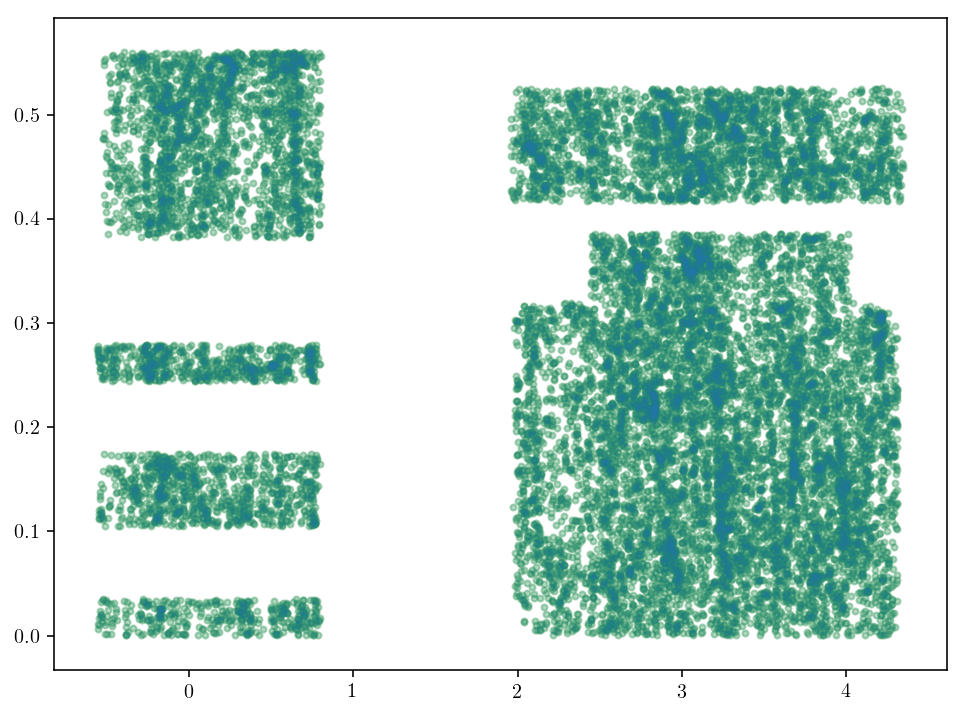

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)#, projection="aitoff")

ax.scatter((DATA['HIra'])*np.pi/180., DATA['HIdec']*np.pi/180., marker='.', color='C2', alpha =0.3)
ax.scatter((fulldata['HIra'])*np.pi/180., fulldata['HIdec']*np.pi/180., marker='.', color='C0', alpha =0.1)

In [27]:
print np.max(fulldata['loghimass']-DATA['loghimass'])
print fulldata['loghimass'].size
print 
print DATA['loghimass'].size

0.0
17513
17513


In [28]:
np.savetxt('data_alpha_70_FULL_DATA.txt', np.transpose([fulldata['AGCNr'],fulldata['HIra'],fulldata['HIdec'],fulldata['v21'],fulldata['vcmb'],\
                                             fulldata['loghimass']]))

In [29]:
print fulldata[fulldata['loghimass']<7.1]['HIra'].shape
print np.min(fulldata['loghimass'])
print np.max(fulldata['loghimass'])
print fulldata['']

(35,)
6.21
10.85


In [2]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)#, projection="aitoff")

# ax.scatter(fulldata[fulldata['loghimass']>10]['HIra']*np.pi/180., fulldata[fulldata['loghimass']>10]['HIdec']*np.pi/180., marker='.', color='C0', alpha =0.1)
# # ax.scatter(fulldata[fulldata['loghimass']>8]['HIra']*np.pi/180., fulldata[fulldata['loghimass']>8]['HIdec']*np.pi/180., marker='.', color='C1', alpha =0.1)

In [1]:
# print np.where(fulldata['w50']<18)
# plt.hist(fulldata['w50'], bins=50)